# **Hand Written Digits Recognistion(MNIST) Using CNN **

**Problem Statement** : Classification of given hand written digits into 10 categories(0-9) using CNN in Keras

 MNIST is a commonly used handwritten digit dataset consisting of 60,000 images in the training set and 10,000 images in the test set. So, each digit has 6000 images in the training set. The digits are size-normalized and centered in a fixed-size ( 28×28 ) image. 

In [1]:
#importing required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from prettytable import PrettyTable

#using tensorflow as backend
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
#changing the class_label into categorical using one-hot encoding
from keras.utils import to_categorical
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import Dropout
from keras import initializers
from keras.layers.normalization import BatchNormalization
from __future__ import print_function
import keras
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [0]:
#loading MNIST dataset and spliting into test and train sets randomly
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

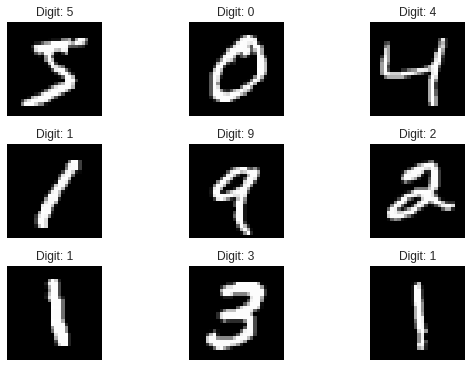

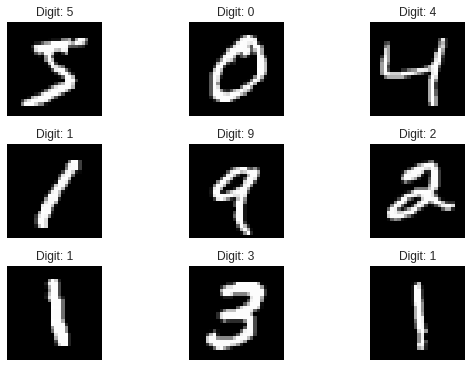

In [3]:
#checking few images in the dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [4]:
#checking the shape of the data

print('Training data shape : ', x_train.shape, y_train.shape)
 
print('Testing data shape : ', x_test.shape, y_train.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes) 

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (60000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [0]:
# Reshaping to format which CNN expects (batch, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1).astype('float32')

In [6]:
#checking the shape of the data after falttening
print("Training data shape :" ,x_train.shape)
print("Test data shape :" , x_test.shape)

Training data shape : (60000, 28, 28, 1)
Test data shape : (10000, 28, 28, 1)


In [0]:
#normalizing the data using min-max scaling with maximum value 255 and minimun value 0
x_train /=255
x_test /=255


In [8]:
#converting class label into categorical using one-hot encoding
print("Class label first image" , y_train[0])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Class label of first image after one-hot encoding" , y_train[0])

Class label first image 5
Class label of first image after one-hot encoding [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#assigning model parameters
output_dim = 10 #as we are using softmax classifier and we have 10 class-labels for classification
input_shape = (28, 28, 1)
batch_size = 128 #size of randomly taken points for each epoch
n_epochs = 15 #number of iterations to reach optimal parameters

In [0]:
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
#lists for appending the results of each model
train_loss_list =[];
test_loss_list =[];
train_accuracy_list =[];
test_accuracy_list = []

# **Buidling CNN Model with 3 CONV-Layers**

In [12]:
#Building CNN Model
model = Sequential()

#Activation:"ReLu" , Optimizer = "Adam" and softmax classifier as output layes(multi-class classification)
#64 convolution filters used each of size 3x3
model.add(Conv2D(filters=32, kernel_size=(3, 3),strides = (2,2),activation='relu',
                 input_shape=input_shape,data_format = "channels_last",padding ="valid",use_bias =True,kernel_initializer = "he_normal",bias_initializer='zeros'))
#32 convolution filters used each of size 3x3
model.add(Conv2D(32, (3, 3),strides = (2,2), padding ="valid",activation='relu',kernel_initializer = "he_normal",bias_initializer='zeros'))
#16 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3),strides = (2,2),padding ="valid", activation='relu',kernel_initializer = "he_normal",bias_initializer='zeros'))
#choosing best features via maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#flattening to avoid too many dimensions
model.add(Flatten())
#fully connected hidden layer
model.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
#getting the probabilites for each class
model.add(Dense(output_dim, activation='softmax'))
#we use categorical crossentropy since we have multiple classes
model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])
#training the model
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 106us/step - loss: 0.3504 - acc: 0.8939 - val_loss: 0.1177 - val_acc: 0.9635
Epoch 2/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0996 - acc: 0.9699 - val_loss: 0.0765 - val_acc: 0.9775
Epoch 3/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0696 - acc: 0.9778 - val_loss: 0.0690 - val_acc: 0.9787
Epoch 4/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0548 - acc: 0.9831 - val_loss: 0.0551 - val_acc: 0.9834
Epoch 5/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0459 - acc: 0.9856 - val_loss: 0.0626 - val_acc: 0.9807
Epoch 6/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.0373 - acc: 0.9879 - val_loss: 0.0528 - val_acc: 0.9849
Epoch 7/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0308 - acc: 0.9899 - val_loss: 0.0607 - val_ac

In [13]:
#evaluating on test-data
[test_loss, test_acc] = model.evaluate(x_test, y_test)
[train_loss, train_acc] = model.evaluate(x_train, y_train)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss, test_acc*100))
train_loss_list.append(train_loss)
test_loss_list.append(test_loss)
train_accuracy_list.append(train_acc)
test_accuracy_list.append(test_acc)

60000/60000 [==============================] - 5s 85us/step
Evaluation result on Test Data : Loss = 0.06099633532044754, accuracy = 98.6%


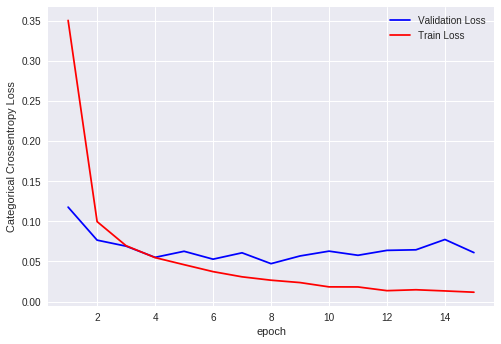

Text(0.5,1,'Accuracy Curves')

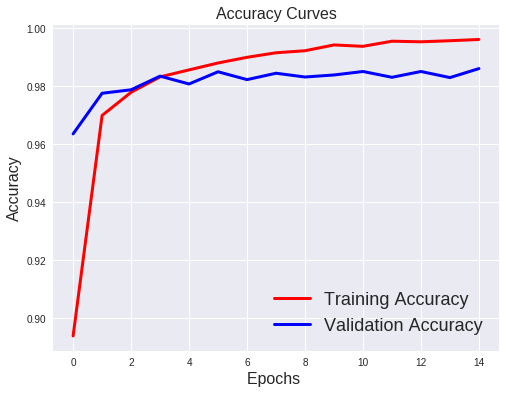

In [14]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


## **Buidling CNN Model with 5 CONV-Layers**

In [15]:
#building a CNN with 5 conv-layers
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=input_shape))
model1.add(Conv2D(32, (5, 5), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
 
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
 
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
 
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(output_dim, activation='softmax'))

#we use categorical crossentropy since we have multiple classes
model1.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])
#training the model
history1 = model1.fit(x_train, y_train, batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 208us/step - loss: 0.3223 - acc: 0.8920 - val_loss: 0.0423 - val_acc: 0.9861
Epoch 2/15
60000/60000 [==============================] - 11s 191us/step - loss: 0.0785 - acc: 0.9753 - val_loss: 0.0330 - val_acc: 0.9894
Epoch 3/15
60000/60000 [==============================] - 11s 190us/step - loss: 0.0610 - acc: 0.9816 - val_loss: 0.0235 - val_acc: 0.9917
Epoch 4/15
60000/60000 [==============================] - 11s 189us/step - loss: 0.0489 - acc: 0.9855 - val_loss: 0.0242 - val_acc: 0.9915
Epoch 5/15
60000/60000 [==============================] - 11s 189us/step - loss: 0.0432 - acc: 0.9871 - val_loss: 0.0243 - val_acc: 0.9922
Epoch 6/15
60000/60000 [==============================] - 11s 189us/step - loss: 0.0404 - acc: 0.9879 - val_loss: 0.0176 - val_acc: 0.9937
Epoch 7/15
60000/60000 [==============================] - 11s 190us/step - loss: 0.0343 - acc: 0.9899 - val_loss: 0.

In [16]:
#evaluating on test-data
[test_loss1, test_acc1] = model1.evaluate(x_test, y_test)
[train_loss1, train_acc1] = model1.evaluate(x_train, y_train)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss1, test_acc1*100))
train_loss_list.append(train_loss1)
test_loss_list.append(test_loss1)
train_accuracy_list.append(train_acc1)
test_accuracy_list.append(test_acc1)

60000/60000 [==============================] - 8s 138us/step
Evaluation result on Test Data : Loss = 0.020779610438312376, accuracy = 99.35000000000001%


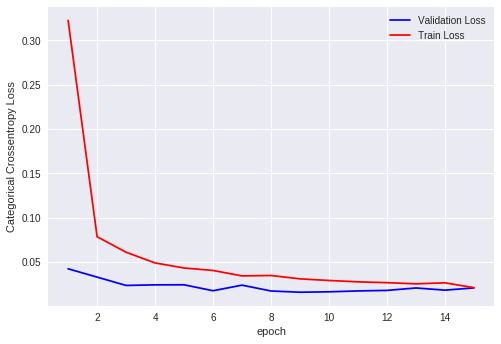

Text(0.5,1,'Accuracy Curves')

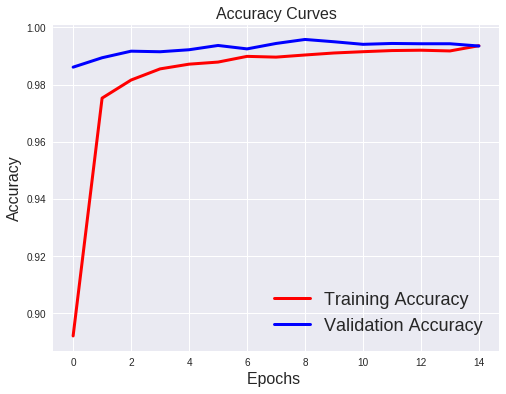

In [17]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history1.history['val_loss']
ty = history1.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['acc'],'r',linewidth=3.0)
plt.plot(history1.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


# Buidling CNN Model with 7 CONV-Layers

In [18]:
#building a CNN with 7 conv-layers
model2 = Sequential()
model2.add(Conv2D(32, (7, 7), padding='same', activation='relu', input_shape=input_shape))
model2.add(Conv2D(32, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(1, 1)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(1, 1)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(output_dim, activation='softmax'))

#we use categorical crossentropy since we have multiple classes
model2.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])
#training the model
history2 = model2.fit(x_train, y_train, batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 240us/step - loss: 0.3334 - acc: 0.8892 - val_loss: 0.0509 - val_acc: 0.9849
Epoch 2/15
60000/60000 [==============================] - 13s 222us/step - loss: 0.0788 - acc: 0.9768 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 3/15
60000/60000 [==============================] - 13s 223us/step - loss: 0.0614 - acc: 0.9820 - val_loss: 0.0345 - val_acc: 0.9897
Epoch 4/15
60000/60000 [==============================] - 13s 224us/step - loss: 0.0481 - acc: 0.9862 - val_loss: 0.0242 - val_acc: 0.9929
Epoch 5/15
60000/60000 [==============================] - 13s 223us/step - loss: 0.0445 - acc: 0.9869 - val_loss: 0.0252 - val_acc: 0.9919
Epoch 6/15
60000/60000 [==============================] - 13s 223us/step - loss: 0.0378 - acc: 0.9896 - val_loss: 0.0217 - val_acc: 0.9931
Epoch 7/15
60000/60000 [==============================] - 13s 222us/step - loss: 0.0346 - acc: 0.9894 - val_loss: 0.

In [19]:
#evaluating on test-data
[test_loss2, test_acc2] = model2.evaluate(x_test, y_test)
[train_loss2, train_acc2] = model2.evaluate(x_train, y_train)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss2, test_acc2*100))
train_loss_list.append(train_loss2)
test_loss_list.append(test_loss2)
train_accuracy_list.append(train_acc2)
test_accuracy_list.append(test_acc2)

60000/60000 [==============================] - 10s 159us/step
Evaluation result on Test Data : Loss = 0.020083879229649573, accuracy = 99.4%


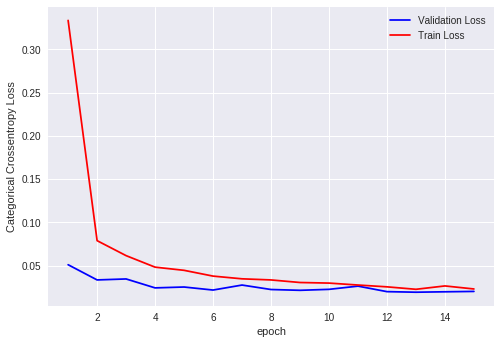

Text(0.5,1,'Accuracy Curves')

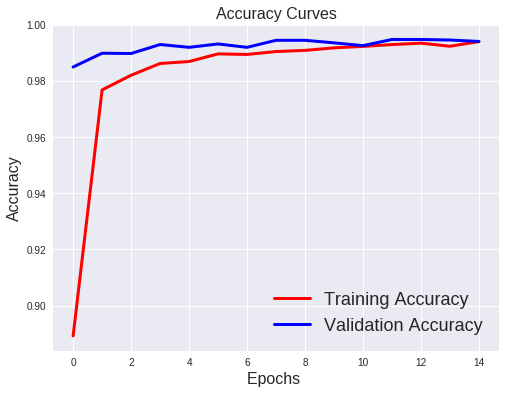

In [20]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


# Conclusions:

In [21]:
#reporting the results in a table
order_list = [0,1,2]
layers_list =[3,5,7]

for i in order_list:
  t= PrettyTable()
  t.field_names =["metric/parameter" , "result"]
  t.add_row (["Model" ,"Classification"])
  t.add_row(["Algorithm","CNN"])
  t.add_row (["Conv-layers" ,layers_list[i]])
  t.add_row(["Activation","Relu"])
  t.add_row(["optimizer","Adam"])
  t.add_row(["Padding","Yes"])
  t.add_row(["Dropout","Yes"])
  t.add_row (["Train-logloss" ,round(train_loss_list[i],2)])
  t.add_row (["Test-logloss" ,round(test_loss_list[i],2)])
  t.add_row(["Train-accuracy",round(train_accuracy_list[i]*100,2)])
  t.add_row(["Test-accuracy",round(test_accuracy_list[i]*100,2)])
  print(t)
    

+------------------+----------------+
| metric/parameter |     result     |
+------------------+----------------+
|      Model       | Classification |
|    Algorithm     |      CNN       |
|   Conv-layers    |       3        |
|    Activation    |      Relu      |
|    optimizer     |      Adam      |
|     Padding      |      Yes       |
|     Dropout      |      Yes       |
|  Train-logloss   |      0.01      |
|   Test-logloss   |      0.06      |
|  Train-accuracy  |     99.71      |
|  Test-accuracy   |      98.6      |
+------------------+----------------+
+------------------+----------------+
| metric/parameter |     result     |
+------------------+----------------+
|      Model       | Classification |
|    Algorithm     |      CNN       |
|   Conv-layers    |       5        |
|    Activation    |      Relu      |
|    optimizer     |      Adam      |
|     Padding      |      Yes       |
|     Dropout      |      Yes       |
|  Train-logloss   |      0.01      |
|   Test-log

# Training with Data Augmentation

In [22]:
#data-augmentation
from keras.preprocessing.image import ImageDataGenerator
 
model3 = Sequential()
#Activation:"ReLu" , Optimizer = "Adam" and softmax classifier as output layes(multi-class classification)
#64 convolution filters used each of size 3x3
model3.add(Conv2D(filters=32, kernel_size=(3, 3),strides = (2,2),activation='relu',
                 input_shape=input_shape,data_format = "channels_last",padding ="valid",use_bias =True,kernel_initializer = "he_normal",bias_initializer='zeros'))
#32 convolution filters used each of size 3x3
model3.add(Conv2D(32, (3, 3),strides = (2,2), padding ="valid",activation='relu',kernel_initializer = "he_normal",bias_initializer='zeros'))
#16 convolution filters used each of size 3x3
model3.add(Conv2D(64, (3, 3),strides = (2,2),padding ="valid", activation='relu',kernel_initializer = "he_normal",bias_initializer='zeros'))
#choosing best features via maxpooling
model3.add(MaxPooling2D(pool_size=(2, 2)))
#flattening to avoid too many dimensions
model3.add(Flatten())
#fully connected hidden layer
model3.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
#getting the probabilites for each class
model3.add(Dense(output_dim, activation='softmax'))
#we use categorical crossentropy since we have multiple classes
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

batch_size = 128
epochs = 15
datagen = ImageDataGenerator(
         zoom_range=0.1, # randomly zoom into images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
 
# Fit the model on the batches generated by datagen.flow().
history3 = model3.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              workers=4)


Epoch 1/15
469/469 [==============================] - 35s 76ms/step - loss: 0.6652 - acc: 0.7868 - val_loss: 0.1540 - val_acc: 0.9532
Epoch 2/15
469/469 [==============================] - 35s 74ms/step - loss: 0.2542 - acc: 0.9215 - val_loss: 0.1074 - val_acc: 0.9659
Epoch 3/15
469/469 [==============================] - 35s 74ms/step - loss: 0.1923 - acc: 0.9409 - val_loss: 0.0777 - val_acc: 0.9759
Epoch 4/15
469/469 [==============================] - 35s 75ms/step - loss: 0.1583 - acc: 0.9511 - val_loss: 0.0738 - val_acc: 0.9770
Epoch 5/15
469/469 [==============================] - 35s 74ms/step - loss: 0.1386 - acc: 0.9575 - val_loss: 0.0644 - val_acc: 0.9785
Epoch 6/15
469/469 [==============================] - 35s 75ms/step - loss: 0.1211 - acc: 0.9628 - val_loss: 0.0539 - val_acc: 0.9830
Epoch 7/15
469/469 [==============================] - 35s 74ms/step - loss: 0.1162 - acc: 0.9643 - val_loss: 0.0729 - val_acc: 0.9763
Epoch 8/15
469/469 [==============================] - 35s 74ms

In [23]:
#evaluating on test-data
[test_loss3, test_acc3] = model3.evaluate(x_test, y_test)
[train_loss3, train_acc3] = model3.evaluate(x_train, y_train)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss3, test_acc3*100))
train_loss_list.append(train_loss3)
test_loss_list.append(test_loss3)
train_accuracy_list.append(train_acc3)
test_accuracy_list.append(test_acc3)

60000/60000 [==============================] - 5s 87us/step
Evaluation result on Test Data : Loss = 0.03663182737634051, accuracy = 98.74000000000001%


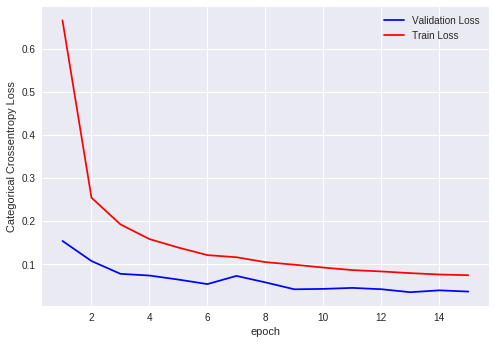

Text(0.5,1,'Accuracy Curves')

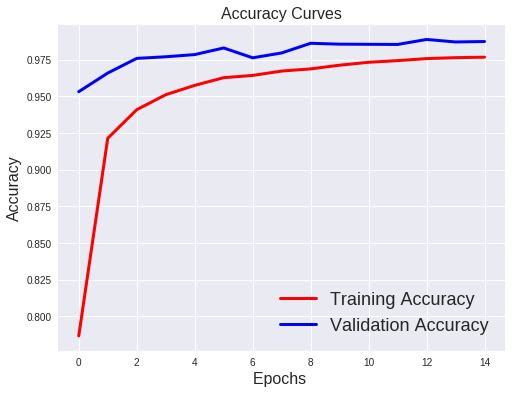

In [24]:
#checking for overfitting 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.grid(True)
plt.show()
    
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history3.history['acc'],'r',linewidth=3.0)
plt.plot(history3.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
